<a href="https://colab.research.google.com/github/NguyenAnhKietUIT/IS254.O11/blob/main/Book_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import

##Import libraries

In [1]:
# Import the numpy library for numerical computations
import numpy as np

# Import the pandas library for working with tabular data
import pandas as pd

# Import matplotlib for basic plotting functionality
import matplotlib.pyplot as plt

# Import seaborn for enhanced data visualization
import seaborn as sns

# Import the fastai library for machine learning tools
from fastai import *
from fastai.collab import *

# Import the itemgetter function from the operator module
from operator import itemgetter

# Now you can write your Python code with these libraries

##Import datasets

In [2]:
# Set the maximum column width for DataFrame display to None
# This ensures that when displaying DataFrames, no text content in columns is truncated or wrapped,
# allowing you to see the full content of each cell without horizontal scrolling.
pd.set_option('display.max_colwidth', None)

###Ratings

In [3]:
# Read data from a CSV file containing book ratings using pandas
# The file is located at '/content/drive/MyDrive/Data/BX-Book-Ratings.csv'

# The data in the CSV file is separated by a semicolon (';') and encoded in 'latin1' encoding
ratings = pd.read_csv('/content/drive/MyDrive/Data/BX-Book-Ratings.csv', delimiter=";", encoding="latin1")

# Rename the columns of the DataFrame to more descriptive names
# The columns are renamed to 'userId', 'ISBN', and 'bookRating'
ratings.columns = ['userId', 'ISBN', 'bookRating']

# Display the resulting DataFrame, showing user IDs, book ISBNs, and book ratings
ratings

,userId,ISBN,bookRating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


###Users

In [4]:
# Read data from a CSV file containing user information using pandas
# The file is located at '/content/drive/MyDrive/Data/BX-Users.csv'

# The data in the CSV file is separated by a semicolon (';') and encoded in 'latin1' encoding
users = pd.read_csv('/content/drive/MyDrive/Data/BX-Users.csv', delimiter=";", encoding="latin1")

# Rename the columns of the DataFrame to more descriptive names
# The columns are renamed to 'userId', 'location', and 'age'
users.columns = ['userId', 'location', 'age']

# Display the resulting DataFrame, showing user IDs, user locations, and user ages
users

,userId,location,age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
...,...,...,...
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN


###Books

In [5]:
# Read data from a CSV file containing book information using pandas
# The file is located at '/content/drive/MyDrive/Data/BX-Books.csv'

# The data in the CSV file is separated by a semicolon (';') and encoded in 'latin-1' encoding
# "on_bad_lines" is set to "skip" to ignore lines with errors, and "low_memory" is set to False
# for better memory handling
books = pd.read_csv('/content/drive/MyDrive/Data/BX-Books.csv', delimiter=";", encoding="latin-1",
                    on_bad_lines="skip", low_memory=False)

# Rename the columns of the DataFrame to more descriptive names
# The columns are renamed to 'ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher',
# 'imageURLS', 'imageURLM', and 'imageURLL'
books.columns = ['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher',
                 'imageURLS', 'imageURLM', 'imageURLL']

# Display the resulting DataFrame, showing book ISBNs, titles, authors, publication years, publishers,
# and image URLs
books

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageURLS,imageURLM,imageURLL
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.LZZZZZZZ.jpg
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0060973129.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0060973129.01.LZZZZZZZ.jpg
3,0374157065,Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0374157065.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0374157065.01.LZZZZZZZ.jpg
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0393045218.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0393045218.01.LZZZZZZZ.jpg
...,...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0440400988.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0440400988.01.LZZZZZZZ.jpg
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0525447644.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0525447644.01.LZZZZZZZ.jpg
271357,006008667X,Lily Dale : The True Story of the Town that Talks to the Dead,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/006008667X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/006008667X.01.LZZZZZZZ.jpg
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0192126040.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0192126040.01.LZZZZZZZ.jpg


#Data Preprocessing

##Drop Column

In [6]:
# Drop the columns 'imageURLS', 'imageURLM', and 'imageURLL' from the 'books' DataFrame
# The 'axis=1' argument specifies that columns are being dropped
# The 'inplace=True' argument modifies the 'books' DataFrame in place

# After this operation, the DataFrame 'books' will no longer contain these image URL columns
books.drop(['imageURLS','imageURLM','imageURLL'], axis=1, inplace=True)

# Display the updated 'books' DataFrame with the specified columns removed
books

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company
...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm)
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books
271357,006008667X,Lily Dale : The True Story of the Town that Talks to the Dead,Christine Wicker,2004,HarperSanFrancisco
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press


##Change values

In [7]:
# Display the data types of each column in the 'books' DataFrame
# This operation provides information about the data types used for each column,
# helping you understand the nature of the data in the DataFrame.
books.dtypes

ISBN                 object
bookTitle            object
bookAuthor           object
yearOfPublication    object
publisher            object
dtype: object

In [8]:
# Extract unique values from the 'yearOfPublication' column in the 'books' DataFrame
# This operation returns an array of unique publication years found in the dataset,
# allowing you to identify the distinct years of publication for books.
books.yearOfPublication.unique()

array(['2002', '2001', '1991', '1999', '2000', '1993', '1996', '1988',
       '2004', '1998', '1994', '2003', '1997', '1983', '1979', '1995',
       '1982', '1985', '1992', '1986', '1978', '1980', '1952', '1987',
       '1990', '1981', '1989', '1984', '0', '1968', '1961', '1958',
       '1974', '1976', '1971', '1977', '1975', '1965', '1941', '1970',
       '1962', '1973', '1972', '1960', '1966', '1920', '1956', '1959',
       '1953', '1951', '1942', '1963', '1964', '1969', '1954', '1950',
       '1967', '2005', '1957', '1940', '1937', '1955', '1946', '1936',
       '1930', '2011', '1925', '1948', '1943', '1947', '1945', '1923',
       '2020', '1939', '1926', '1938', '2030', '1911', '1904', '1949',
       '1932', '1928', '1929', '1927', '1931', '1914', '2050', '1934',
       '1910', '1933', '1902', '1924', '1921', '1900', '2038', '2026',
       '1944', '1917', '1901', '2010', '1908', '1906', '1935', '1806',
       '2021', '2012', '2006', 'DK Publishing Inc', 'Gallimard', '1909',
       

In [9]:
# Select rows in the 'books' DataFrame where the 'yearOfPublication' column has
# the value 'DK Publishing Inc'
# This operation retrieves rows where 'DK Publishing Inc' appears as the publication year,
# which may indicate data issues.
books.loc[books.yearOfPublication == 'DK Publishing Inc',:]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)\"";Michael Teitelbaum""",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.01.THUMBZZZ.jpg
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)\"";James Buckley""",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.01.THUMBZZZ.jpg


In [10]:
# Update the 'yearOfPublication', 'bookAuthor', and 'publisher' columns in the 'books' DataFrame
# for the row where the ISBN is '078946697X'

# Set the 'yearOfPublication' to 2000
books.loc[books.ISBN == '078946697X','yearOfPublication'] = 2000

# Set the 'bookAuthor' to "Michael Teitelbaum"
books.loc[books.ISBN == '078946697X','bookAuthor'] = "Michael Teitelbaum"

# Set the 'publisher' to "DK Publishing Inc"
books.loc[books.ISBN == '078946697X','publisher'] = "DK Publishing Inc"

In [11]:
# Update the 'yearOfPublication', 'bookAuthor', and 'publisher' columns in the 'books' DataFrame
# for the row where the ISBN is '0789466953'

# Set the 'yearOfPublication' to 2000
books.loc[books.ISBN == '0789466953', 'yearOfPublication'] = 2000

# Set the 'bookAuthor' to "James Buckley"
books.loc[books.ISBN == '0789466953', 'bookAuthor'] = "James Buckley"

# Set the 'publisher' to "DK Publishing Inc"
books.loc[books.ISBN == '0789466953', 'publisher'] = "DK Publishing Inc"

In [12]:
# Select rows in the 'books' DataFrame where the 'yearOfPublication' column has
# the value 'Gallimard'
# This operation retrieves rows where 'Gallimard' appears as the publication year,
# which may indicate data issues.
books.loc[books.yearOfPublication == 'Gallimard']

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-Marie Gustave Le ClÃ?Â©zio""",2003,Gallimard,http://images.amazon.com/images/P/2070426769.01.THUMBZZZ.jpg


In [13]:
# Update the 'yearOfPublication', 'bookAuthor', and 'publisher' columns in the 'books' DataFrame
# for the row where the ISBN is '2070426769'

# Set the 'yearOfPublication' to 2003
books.loc[books.ISBN == '2070426769','yearOfPublication'] = 2003

# Set the 'bookAuthor' to 'Jean-Marie Gustave Le Clézio'
books.loc[books.ISBN == '2070426769','bookAuthor'] = 'Jean-Marie Gustave Le ClÃ?Â©zio'

# Set the 'publisher' to 'Gallimard'
books.loc[books.ISBN == '2070426769','publisher'] = 'Gallimard'

In [14]:
# Convert the 'yearOfPublication' column in the 'books' DataFrame to a numeric data type
# This operation changes the data type of the 'yearOfPublication' column to a numerical type,
# making it suitable for numerical operations or calculations.
books.yearOfPublication = pd.to_numeric(books.yearOfPublication)

In [15]:
# Extract unique values from the 'yearOfPublication' column in the 'books' DataFrame
# This operation returns an array of unique publication years found in the dataset,
# after converting the 'yearOfPublication' column to a numeric data type.
books.yearOfPublication.unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984,    0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, 2012, 2006, 1909, 2008, 1378,
       1919, 1922, 1897, 2024, 1376, 2037])

##Merge

###Ratings - Books

In [16]:
# Merge the 'ratings' DataFrame and the 'books' DataFrame based on the 'ISBN' column
# This operation combines the two DataFrames using the 'ISBN' column as the common key,
# creating a new DataFrame 'rating_book' that contains both rating information and book details.
rating_book = pd.merge(ratings, books, on='ISBN')

# Display the resulting 'rating_book' DataFrame
rating_book

,userId,ISBN,bookRating,bookTitle,bookAuthor,yearOfPublication,publisher
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
...,...,...,...,...,...,...,...
1031131,276688,0517145553,0,Mostly Harmless,Douglas Adams,1995,Random House Value Pub
1031132,276688,1575660792,7,Gray Matter,Shirley Kennett,1996,Kensington Publishing Corporation
1031133,276690,0590907301,0,Triplet Trouble and the Class Trip (Triplet Trouble),Debbie Dadey,1997,Apple
1031134,276704,0679752714,0,A Desert of Pure Feeling (Vintage Contemporaries),Judith Freeman,1997,Vintage Books USA


###Rating_Book - Users

In [17]:
# Merge the 'rating_book' DataFrame and the 'users' DataFrame based on the 'userId' column
# This operation combines the information from 'rating_book' (ratings and book details)
# and 'users' (user information) using the 'userId' column as the common key,
# creating a new DataFrame 'all_ratings' that contains all the data.
all_ratings = pd.merge(rating_book, users, on='userId')

# Display the resulting 'all_ratings' DataFrame
all_ratings

,userId,ISBN,bookRating,bookTitle,bookAuthor,yearOfPublication,publisher,location,age
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,"tyler, texas, usa",NaN
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,"cincinnati, ohio, usa",23.0
2,2313,0812533550,9,Ender's Game (Ender Wiggins Saga (Paperback)),Orson Scott Card,1986,Tor Books,"cincinnati, ohio, usa",23.0
3,2313,0679745580,8,In Cold Blood (Vintage International),TRUMAN CAPOTE,1994,Vintage,"cincinnati, ohio, usa",23.0
4,2313,0060173289,9,Divine Secrets of the Ya-Ya Sisterhood : A Novel,Rebecca Wells,1996,HarperCollins,"cincinnati, ohio, usa",23.0
...,...,...,...,...,...,...,...,...,...
1031131,276442,2862749796,7,Le Huit,Katherine Neville,2002,Le Cherche Midi,"genève, genève, switzerland",62.0
1031132,276618,3788097000,5,Ludwig Marum: Briefe aus dem Konzentrationslager Kislau,Ludwig Marum,1984,C.F. MÃ¼ller,"stuttgart, \n/a\""., germany""",NaN
1031133,276647,0553571001,0,Christmas With Anne and Other Holiday Stories: And Other Holiday Stories,L. M. Montgomery,2001,Starfire,"arlington heights, illinois, usa",13.0
1031134,276647,0689822294,10,Heaven (Coretta Scott King Author Award Winner),Angela Johnson,1998,Simon &amp; Schuster Children's Publishing,"arlington heights, illinois, usa",13.0


#Visualization

##Chart

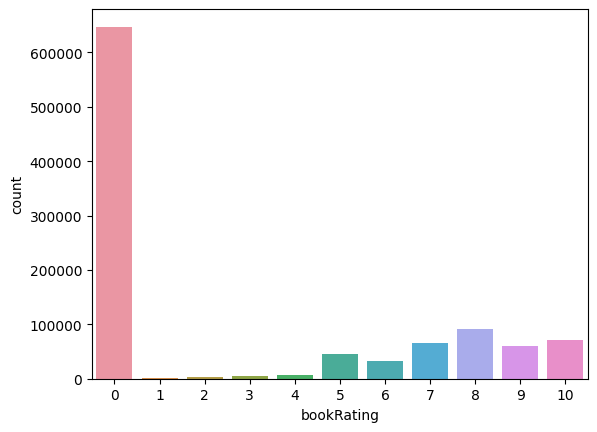

In [18]:
# Create a countplot using Seaborn to display the distribution of book ratings
# Data for the countplot is taken from the 'all_ratings' DataFrame, and the x-axis
# represents the 'bookRating' column.
sns.countplot(data=all_ratings, x='bookRating')

# Display the plot
plt.show()

##Analyze

In [19]:
# Segregate the ratings data into two datasets: explicit ratings (bookRating != 0)
# This operation creates a new DataFrame 'ratings_explicit' containing only explicit ratings.
ratings_explicit = all_ratings[all_ratings.bookRating != 0]

# Display the resulting 'ratings_explicit' DataFrame
ratings_explicit

,userId,ISBN,bookRating,bookTitle,bookAuthor,yearOfPublication,publisher,location,age
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,"cincinnati, ohio, usa",23.0
2,2313,0812533550,9,Ender's Game (Ender Wiggins Saga (Paperback)),Orson Scott Card,1986,Tor Books,"cincinnati, ohio, usa",23.0
3,2313,0679745580,8,In Cold Blood (Vintage International),TRUMAN CAPOTE,1994,Vintage,"cincinnati, ohio, usa",23.0
4,2313,0060173289,9,Divine Secrets of the Ya-Ya Sisterhood : A Novel,Rebecca Wells,1996,HarperCollins,"cincinnati, ohio, usa",23.0
5,2313,0385482388,5,The Mistress of Spices,Chitra Banerjee Divakaruni,1998,Anchor Books/Doubleday,"cincinnati, ohio, usa",23.0
...,...,...,...,...,...,...,...,...,...
1031130,276442,2264032960,6,L'Apprenti du diable,Ellis Peters,2001,Editions 10/18,"genève, genève, switzerland",62.0
1031131,276442,2862749796,7,Le Huit,Katherine Neville,2002,Le Cherche Midi,"genève, genève, switzerland",62.0
1031132,276618,3788097000,5,Ludwig Marum: Briefe aus dem Konzentrationslager Kislau,Ludwig Marum,1984,C.F. MÃ¼ller,"stuttgart, \n/a\""., germany""",NaN
1031134,276647,0689822294,10,Heaven (Coretta Scott King Author Award Winner),Angela Johnson,1998,Simon &amp; Schuster Children's Publishing,"arlington heights, illinois, usa",13.0


In [20]:
# Segregate the ratings data into two datasets: implicit ratings (bookRating == 0)
# This operation creates a new DataFrame 'ratings_implicit' containing only implicit ratings.
ratings_implicit = all_ratings[all_ratings.bookRating == 0]

# Display the resulting 'ratings_implicit' DataFrame
ratings_implicit

,userId,ISBN,bookRating,bookTitle,bookAuthor,yearOfPublication,publisher,location,age
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,"tyler, texas, usa",NaN
9,2313,0449912558,0,The Sparrow,MARY DORIA RUSSELL,1997,Fawcett Books,"cincinnati, ohio, usa",23.0
12,2313,0300069049,0,Cosima Wagner's Diaries: An Abridgement,Cosima Wagner,1997,Yale University Press,"cincinnati, ohio, usa",23.0
16,2313,0375706771,0,Midwives: A Novel,Chris Bohjalian,1998,Vintage,"cincinnati, ohio, usa",23.0
21,2313,0451525078,0,Don Quixote of LA Mancha,Miguel de Cervantes Saavedra,1990,Signet Classics,"cincinnati, ohio, usa",23.0
...,...,...,...,...,...,...,...,...,...
1031120,276047,0747503818,0,Only for a Fortnight: My Life in a Locked Ward,Sue Read,1990,Trafalgar Square,"shoreham-by-sea, , united kingdom",33.0
1031121,276054,0738840459,0,BUZZ,Carrie Lieber,2001,Xlibris Corporation,"novato, california, usa",NaN
1031122,276061,0879977086,0,The Werewolf Principle,Clifford Simak,1982,New Amer Library (Mm),"madrid, n/a, spain",27.0
1031127,276262,0741411504,0,The Bottoms Up of International Development,Richard Saunier,2002,Infinity Publishing (PA),"santa fe, new mexico, usa",68.0


#Experiment

##Preparing

In [21]:
# Create collaborative filtering data loaders from the 'all_ratings' DataFrame
# The data loaders are created using FastAI's CollabDataLoaders.from_df function.
# - The 'seed' parameter sets the random seed for reproducibility.
# - The 'valid_pct' parameter specifies the percentage of data to be used for validation
# (in this case, 10%).
# - The 'item_name' parameter sets the name of the item column in the DataFrame,
# which is 'bookTitle' in this case.
data = CollabDataLoaders.from_df(all_ratings, seed=42, valid_pct=0.1, item_name="bookTitle")

# Display a batch of data from the data loaders
data.show_batch()

,userId,bookTitle,bookRating
0,240403,Dragonwings : Golden Mountain Chronicles: 1903 (Golden Mountain Chronicles),10
1,98930,The Eyes of the Dragon,0
2,140346,The Divine Secrets of the Ya-Ya Sisterhood: A Novel,9
3,72423,The Shadow in the North,0
4,41701,Les Liaisons Dangereuses (World Classics),0
5,225087,The Relaxation Response,0
6,156300,Unfit to Practice,0
7,98391,Some Like It Sizzling,8
8,177458,X-Men 2: A Novelization,0
9,147136,Snow White and the Seven Samurai,4


SuggestedLRs(valley=0.0691830962896347)

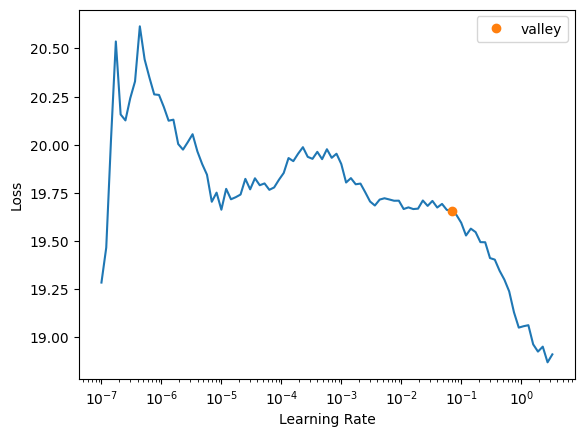

In [22]:
# Create a collaborative filtering learner using FastAI's collab_learner function
# - The 'data' parameter provides the data loaders for training and validation.
# - The 'n_factors' parameter sets the number of factors for the model.
# - The 'y_range' parameter specifies the range of predicted ratings (from 0 to 10 in this case).
# - The 'wd' parameter sets the weight decay for regularization.
learn = collab_learner(data, n_factors=20,  y_range=(0.,10.0), wd=1e-1)

# Find the learning rate for the model
learn.lr_find()

In [23]:
# Train the collaborative filtering model using the "One Cycle Policy" for 5 epochs
# - The '5' specifies the number of epochs for training.
# - The '5e-2' is the learning rate used during training.
learn.fit_one_cycle(5, 5e-2)

epoch,train_loss,valid_loss,time
0,14.112310,14.051671,02:04
1,14.192636,14.050092,02:03
2,13.829292,13.784986,02:03
3,13.434204,13.359178,02:03
4,12.950586,12.995091,02:06


In [24]:
# Save the trained model to a file
# The model's state and weights are saved to the specified file path.
learn.save('/content/drive/MyDrive/Data/all_ratings_fit1')

Path('/content/drive/MyDrive/Data/all_ratings_fit1.pth')

In [25]:
# Create collaborative filtering data loaders from the 'ratings_explicit' DataFrame
# The data loaders are created using FastAI's CollabDataLoaders.from_df function.
# - The 'seed' parameter sets the random seed for reproducibility.
# - The 'pct_val' parameter specifies the percentage of data to be used for validation
# (in this case, 10%).
# - The 'item_name' parameter sets the name of the item column in the DataFrame,
# which is 'bookTitle' in this case.
data = CollabDataLoaders.from_df(ratings_explicit, seed=42, pct_val=0.1, item_name="bookTitle")

# Display a batch of data from the data loaders
data.show_batch()

,userId,bookTitle,bookRating
0,93565,"Cracking Da Vinci's Code: You've Read the Fiction, Now Read the Facts",8
1,98391,Yours Until Dawn,10
2,70066,Dark Melody,10
3,242083,Harry Potter and the Goblet of Fire (Book 4),9
4,69156,"With This Puzzle, I Thee Kill",7
5,208727,The Last Precinct,5
6,224904,"Beware, Princess Elizabeth: A Young Royals Book",9
7,230013,Candy,8
8,205845,The Once and Future King,9
9,221040,The Dangerous Lives of Altar Boys,9


SuggestedLRs(valley=0.14454397559165955)

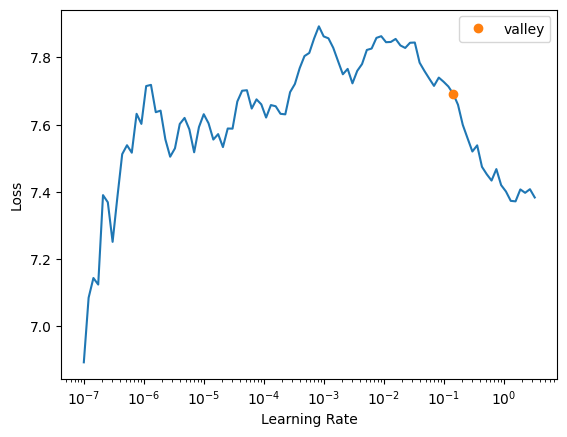

In [26]:
# Create a collaborative filtering learner using FastAI's collab_learner function
# - The 'data' parameter provides the data loaders for training and validation.
# - The 'n_factors' parameter sets the number of factors for the model.
# - The 'y_range' parameter specifies the range of predicted ratings
# (from 1.0 to 10.0 in this case).
# - The 'wd' parameter sets the weight decay for regularization
learn = collab_learner(data, n_factors=20,  y_range=(1.0,10.0), wd=1e-1)

# Find the learning rate for the model
learn.lr_find()

In [27]:
# Train the collaborative filtering model using the "One Cycle Policy" for 5 epochs
# - The '5' specifies the number of epochs for training.
# - The '5e-3' is the learning rate used during training.
learn.fit_one_cycle(5, 5e-3)

epoch,train_loss,valid_loss,time
0,4.783593,4.817297,00:38
1,4.463075,4.367072,00:37
2,4.157833,4.309585,00:37
3,3.917148,4.277093,00:38
4,3.711016,4.272058,00:38


In [28]:
# Save the trained model on explicit ratings to a file
# The model's state and weights are saved to the specified file path.
learn.save('/content/drive/MyDrive/Data/ratings_explicit_fit1')

Path('/content/drive/MyDrive/Data/ratings_explicit_fit1.pth')

In [29]:
# Load the pre-trained model for explicit ratings from the specified file path
# The model's state and weights are loaded from the file.
learn.load('/content/drive/MyDrive/Data/ratings_explicit_fit1')

In [30]:
# Access the trained collaborative filtering model
# This operation retrieves the model that has been trained using collaborative filtering.
learn.model

EmbeddingDotBias(
  (u_weight): Embedding(59899, 20)
  (i_weight): Embedding(135568, 20)
  (u_bias): Embedding(59899, 1)
  (i_bias): Embedding(135568, 1)
)

In [31]:
# Group the data in 'ratings_explicit' by book title and count the number of ratings for each book
g = ratings_explicit.groupby(ratings_explicit.bookTitle)['bookRating'].count()

# Sort the books in descending order of the number of ratings and select the top 1,000 books
top_books = g.sort_values(ascending=False).index.values[:1000]

# Display the titles of the top 10 books
top_books[:10]

array(['The Lovely Bones: A Novel', 'Wild Animus', 'The Da Vinci Code',
       'The Secret Life of Bees', 'The Nanny Diaries: A Novel',
       'The Red Tent (Bestselling Backlist)', "Bridget Jones's Diary",
       'A Painted House', 'Life of Pi',
       'Harry Potter and the Chamber of Secrets (Book 2)'], dtype=object)

In [32]:
# Calculate the bias (offset) for the top books using the trained model
# The 'is_item=True' parameter indicates that we are calculating item biases (book biases).
book_bias = learn.bias(top_books, is_item=True)

# Display the shape of the resulting book bias array
book_bias.shape

torch.Size([1000])

In [33]:
# Calculate the mean rating for each book in 'ratings_explicit'
mean_ratings = ratings_explicit.groupby(ratings_explicit.bookTitle)['bookRating'].mean()

# Create a list 'book_ratings' containing pairs of book titles, item indices,
# and their mean ratings
# The list is formed by combining book titles from 'top_books' with their corresponding biases
# from 'book_bias'.
book_ratings = [(b, i, mean_ratings.loc[i]) for i,b in zip(top_books, book_bias)]

In [34]:
# Define a lambda function 'item0' to extract the first element from a given argument 'o'
item0 = lambda o:o[0]

In [35]:
# Sort the 'book_ratings' list by the first element (book title) in each pair, in ascending order
# Extract the first element using the 'item0' lambda function as the sorting key.
# Return the top 15 books in the sorted list.
sorted(book_ratings, key=item0)[:15]

[(tensor(-0.2931), 'Wild Animus', 4.3907056798623065),
 (tensor(-0.0821), 'Isle of Dogs', 5.433962264150943),
 (tensor(-0.0597), 'Four Blondes', 5.393939393939394),
 (tensor(-0.0078), '4 Blondes', 5.653846153846154),
 (tensor(0.0231), 'Violin', 6.1063829787234045),
 (tensor(0.0309), 'Sex &amp; the City', 6.184210526315789),
 (tensor(0.0378),
  'Forever... : A Novel of Good and Evil, Love and Hope',
  6.945945945945946),
 (tensor(0.0523),
  "Full Tilt (Janet Evanovich's Full Series)",
  6.568627450980392),
 (tensor(0.0558), 'The Sky Is Falling', 6.341463414634147),
 (tensor(0.0668), "Dr. Atkins' New Diet Revolution", 6.813953488372093),
 (tensor(0.0697),
  'Scarlett : The Sequel to Margaret Mitchell\'s \\Gone With the Wind\\""',
  7.0),
 (tensor(0.0763), 'The Little Friend', 6.2727272727272725),
 (tensor(0.0777), 'Primary Colors: A Novel of Politics', 6.674418604651163),
 (tensor(0.0840),
  'Portrait of a Killer: Jack the Ripper -- Case Closed',
  6.574468085106383),
 (tensor(0.0858), '

In [36]:
# Sort the 'book_ratings' list by the first element (book title) in each pair, in descending order
# Extract the first element using a lambda function as the sorting key.
# Return the top 15 books in the sorted list.
sorted(book_ratings, key=lambda o: o[0], reverse=True)[:15]

[(tensor(0.8555),
  "Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))",
  8.936507936507937),
 (tensor(0.7901), 'The Secret Life of Bees', 8.47783251231527),
 (tensor(0.7871), 'To Kill a Mockingbird', 8.97752808988764),
 (tensor(0.7867), 'The Lovely Bones: A Novel', 8.185289957567186),
 (tensor(0.7865), 'The Da Vinci Code', 8.43927125506073),
 (tensor(0.7454),
  "Ender's Game (Ender Wiggins Saga (Paperback))",
  8.920529801324504),
 (tensor(0.7402),
  'Harry Potter and the Prisoner of Azkaban (Book 3)',
  9.04332129963899),
 (tensor(0.7254), 'A Prayer for Owen Meany', 8.615384615384615),
 (tensor(0.6938), 'The Red Tent (Bestselling Backlist)', 8.182767624020888),
 (tensor(0.6829),
  "Tuesdays with Morrie: An Old Man, a Young Man, and Life's Greatest Lesson",
  8.588),
 (tensor(0.6715),
  'Harry Potter and the Chamber of Secrets (Book 2)',
  8.840490797546012),
 (tensor(0.6578),
  "Where the Heart Is (Oprah's Book Club (Paperback))",
  8.142372881355932),
 (tensor(0.6572

In [37]:
# Calculate the weights (importance) for the books in 'top_books' using the trained model
# The 'is_item=True' parameter indicates that we are calculating item weights (book weights).
book_weights = learn.weight(top_books, is_item=True)

# Display the shape of the resulting book weights array
book_weights.shape

torch.Size([1000, 20])

In [38]:
# Perform Principal Component Analysis (PCA) on the book weights to reduce dimensionality to 3 components
book_pca = book_weights.pca(3)

# Display the shape of the resulting book PCA matrix
book_pca.shape

torch.Size([1000, 3])

In [39]:
# Extract and assign individual components from the PCA matrix 'book_pca'
# - 'fac0' represents the first principal component.
# - 'fac1' represents the second principal component.
# - 'fac2' represents the third principal component.
fac0,fac1,fac2 = book_pca.t()

##Feature 1

In [40]:
# Create a list 'book_comp' containing pairs of principal component values and book titles
# by combining values from 'fac0' and book titles from 'top_books'.
book_comp = [(f, i) for f,i in zip(fac0, top_books)]

# Sort the list by the first component (fac0) in descending order and select the top 10 items.
sorted(book_comp, key=itemgetter(0), reverse=True)[:10]

[(tensor(1.7271), 'Wild Animus'),
 (tensor(1.0684), 'Isle of Dogs'),
 (tensor(0.8325), 'Slow Waltz in Cedar Bend'),
 (tensor(0.8025), '4 Blondes'),
 (tensor(0.7113), 'A Patchwork Planet'),
 (tensor(0.6781), 'Russendisko.'),
 (tensor(0.6602), 'Free'),
 (tensor(0.6408), "Full Tilt (Janet Evanovich's Full Series)"),
 (tensor(0.6404), 'How to Be Good'),
 (tensor(0.6320), 'Portrait of a Killer: Jack the Ripper -- Case Closed')]

In [41]:
# Sort the 'book_comp' list by the first component (fac0) in ascending order
# Select the top 10 items from the sorted list.
sorted(book_comp, key=itemgetter(0))[:10]

[(tensor(-1.3572), 'The Two Towers (The Lord of the Rings, Part 2)'),
 (tensor(-1.2213),
  'The Hobbit : The Enchanting Prelude to The Lord of the Rings'),
 (tensor(-1.2099), 'The Return of the King (The Lord of the Rings, Part 3)'),
 (tensor(-1.2021),
  'The Fellowship of the Ring (The Lord of the Rings, Part 1)'),
 (tensor(-1.1897),
  "Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))"),
 (tensor(-1.1428), 'To Kill a Mockingbird'),
 (tensor(-1.1378), 'Harry Potter and the Goblet of Fire (Book 4)'),
 (tensor(-1.1225), "Harry Potter and the Sorcerer's Stone (Book 1)"),
 (tensor(-1.0465), 'Harry Potter and the Prisoner of Azkaban (Book 3)'),
 (tensor(-1.0435), "Ender's Game (Ender Wiggins Saga (Paperback))")]

##Feature 2

In [42]:
# Create a list 'book_comp' containing pairs of the second principal component values and book titles
# by combining values from 'fac1' and book titles from 'top_books'.
book_comp = [(f, i) for f,i in zip(fac1, top_books)]

# Sort the list by the second component (fac1) in descending order and select the top 10 items.
sorted(book_comp, key=itemgetter(0), reverse=True)[:10]

[(tensor(0.7739), 'Life of Pi'),
 (tensor(0.7174), 'Chocolat'),
 (tensor(0.6446),
  'Zen and the Art of Motorcycle Maintenance: An Inquiry into Values'),
 (tensor(0.5748), 'The Red Tent (Bestselling Backlist)'),
 (tensor(0.5368), "Bridget Jones's Diary"),
 (tensor(0.5262), 'Prodigal Summer: A Novel'),
 (tensor(0.5098), 'The Last Time They Met : A Novel'),
 (tensor(0.4473), 'Evening Class'),
 (tensor(0.4418),
  'A Lesson Before Dying (Vintage Contemporaries (Paperback))'),
 (tensor(0.4381), 'Free')]

In [43]:
# Sort the 'book_comp' list by the second component (fac1) in ascending order
# Select the top 10 items from the sorted list.
sorted(book_comp, key=itemgetter(0))[:10]

[(tensor(-1.2014),
  "Left Behind: A Novel of the Earth's Last Days (Left Behind No. 1)"),
 (tensor(-0.9256),
  'Tribulation Force: The Continuing Drama of Those Left Behind (Left Behind No. 2)'),
 (tensor(-0.8795), 'Harry Potter and the Prisoner of Azkaban (Book 3)'),
 (tensor(-0.8758), 'Harry Potter and the Chamber of Secrets (Book 2)'),
 (tensor(-0.8455), "Suzanne's Diary for Nicholas"),
 (tensor(-0.8353), 'Soul Harvest: The World Takes Sides (Left Behind No. 4)'),
 (tensor(-0.7805),
  "Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))"),
 (tensor(-0.7746), "Harry Potter and the Sorcerer's Stone (Book 1)"),
 (tensor(-0.7415), 'Harry Potter and the Goblet of Fire (Book 4)'),
 (tensor(-0.6606), 'The Rescue')]

##Feature 3

In [44]:
# Create a list 'book_comp' containing pairs of the third principal component values and book titles
# by combining values from 'fac2' and book titles from 'top_books'.
book_comp = [(f, i) for f,i in zip(fac2, top_books)]

# Sort the list by the third component (fac2) in descending order and select the top 10 items.
sorted(book_comp, key=itemgetter(0), reverse=True)[:10]

[(tensor(0.6687), 'The Bean Trees'),
 (tensor(0.6506), 'The Secret Life of Bees'),
 (tensor(0.6272), 'A Time to Kill'),
 (tensor(0.6087), 'To Kill a Mockingbird'),
 (tensor(0.5984), 'Outlander'),
 (tensor(0.5849), 'The Horse Whisperer'),
 (tensor(0.5777), 'I Know This Much Is True'),
 (tensor(0.5581), 'Angels &amp; Demons'),
 (tensor(0.5517),
  "The Pilot's Wife : A Novel Tag: Author of the Weight of Water (Oprah's Book Club (Hardcover))"),
 (tensor(0.5283), 'Dragonfly in Amber')]

In [45]:
# Sort the 'book_comp' list by the third component (fac2) in ascending order
# Select the top 10 items from the sorted list.
sorted(book_comp, key=itemgetter(0))[:10]

[(tensor(-0.5826), 'Me Talk Pretty One Day'),
 (tensor(-0.5211), 'Dreamcatcher'),
 (tensor(-0.4920), 'Wizard and Glass (The Dark Tower, Book 4)'),
 (tensor(-0.4761), '1984'),
 (tensor(-0.4559), 'House of Sand and Fog'),
 (tensor(-0.4534), 'The Green Mile'),
 (tensor(-0.4291), 'Interview with the Vampire'),
 (tensor(-0.4215), 'Notes From a Small Planet'),
 (tensor(-0.4207), 'The Queen of the Damned (Vampire Chronicles (Paperback))'),
 (tensor(-0.4189),
  "Slaughterhouse Five or the Children's Crusade: A Duty Dance With Death")]